# Needs

In [1]:
from constants import all_topics_names, folder_meicogsci, folder_meicogsci_2019, folder_models
from helping_functions import get_topics_for_abstract
import os
import json
import collections
import pandas
import statistics
import nltk
import gensim
import matplotlib.pyplot as plt

In [2]:
all_values = ['Challenge', 'Closeness', 'Curiosity', 'Excitement', 'Harmony', 'Ideal', 'Liberty', 'Love', 
             'Practicality', 'Self-expression', 'Stability', 'Structure']

In [3]:
all_files = os.listdir("personality")

In [4]:
all_values_data = collections.defaultdict(dict)
for filename in all_files:
    filename_id = filename.split("_")[-1].split(".")[0]
    with open(os.path.join("personality", filename)) as f:
        data = f.readlines()
        data = " ".join(data)
    data = json.loads(data)
    for value in data["needs"]:
        all_values_data[filename_id][value["name"]] = value["percentile"]

In [5]:
lem = nltk.stem.WordNetLemmatizer()

In [6]:
model_21 = gensim.models.LdaModel.load(os.path.join("models", "LDA_21"))
model_21.minimum_probability = 0.0

In [7]:
# calculate the topics for each abstract
all_files_by_topic = []
for filename in os.listdir(folder_meicogsci):
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci, filename, model_21, lem))
for filename in os.listdir(folder_meicogsci_2019):
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci_2019, filename, model_21, lem))

In [8]:
# putting things into pandas dataframe
data_topics_pandas = pandas.DataFrame(all_files_by_topic)
data_topics_pandas.index = [f.split("_")[-1].split(".")[0] for f in data_topics_pandas[21]]
del data_topics_pandas[21]
del data_topics_pandas[22]
data_topics_pandas.columns = [all_topics_names[i] for i in data_topics_pandas.columns]

In [9]:
# get values for each topic
values_by_topic = collections.defaultdict(dict)
topic_all_together = collections.defaultdict(int)
for current_row in data_topics_pandas.iterrows():
    name_of_row = str(current_row[0])
    if all_values_data[name_of_row] != dict():
        for topic_name, count in current_row[1].items():
            for value in all_values:
                try:
                    values_by_topic[topic_name][value] += count * all_values_data[name_of_row][value]
                except KeyError:
                    values_by_topic[topic_name][value] = count * all_values_data[name_of_row][value]
            topic_all_together[topic_name] += count

In [10]:
# and now I am normalizing the personality per topic
for topic_name in values_by_topic:
    for value in all_values:
        values_by_topic[topic_name][value] = values_by_topic[topic_name][value]/topic_all_together[topic_name]

In [11]:
# change into data frame
values_by_topic = pandas.DataFrame(values_by_topic).T

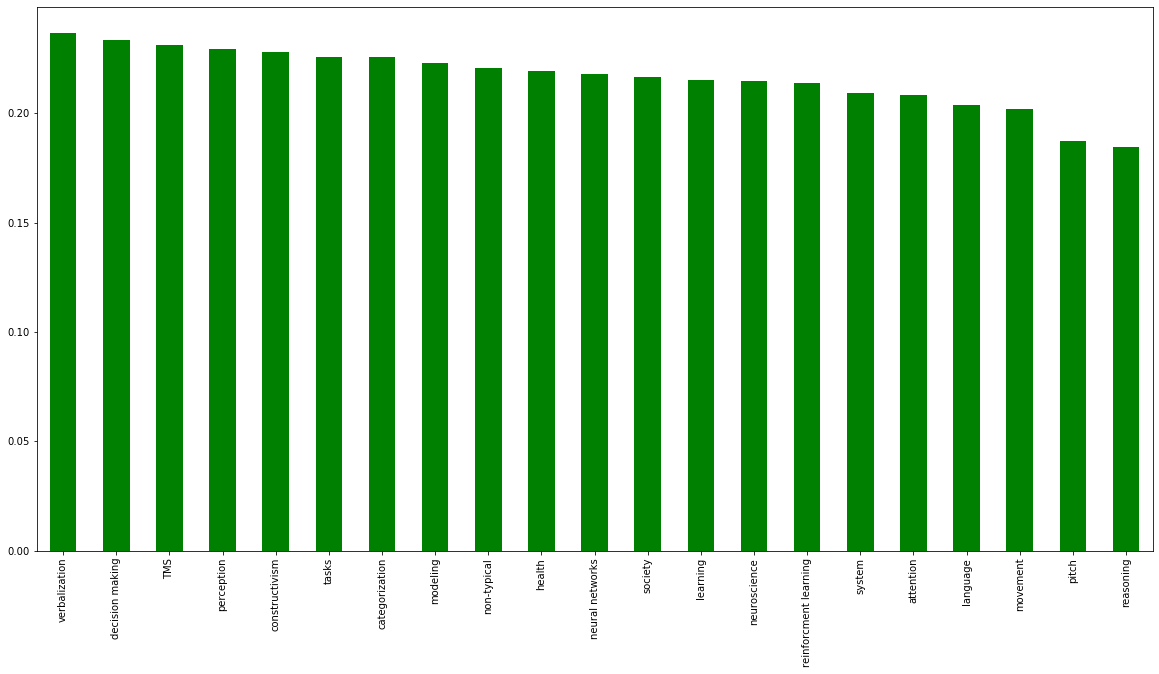

In [12]:
# plot for Challenge
values_by_topic.sort_values(by="Challenge", ascending=False)["Challenge"].plot(kind="bar", figsize=(20, 10), color="green")

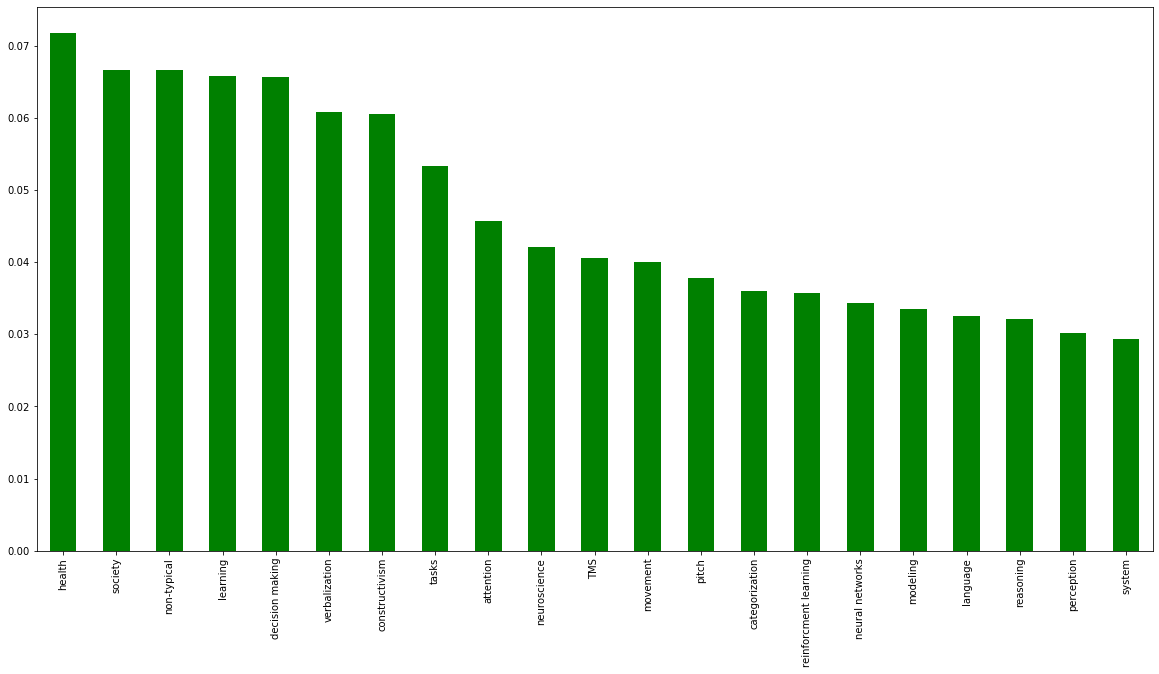

In [13]:
# plot for closeness
values_by_topic.sort_values(by='Closeness', ascending=False)['Closeness'].plot(kind="bar", figsize=(20, 10), color="green")

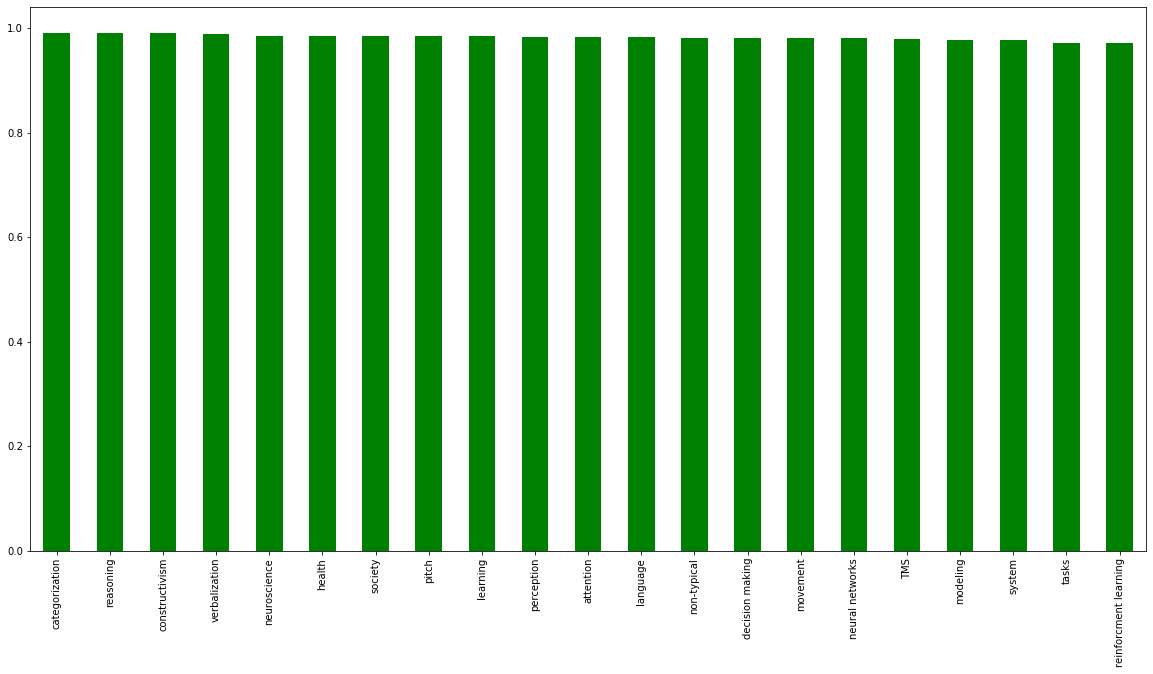

In [14]:
values_by_topic.sort_values(by='Curiosity', ascending=False)['Curiosity'].plot(kind="bar", figsize=(20, 10), color="green")

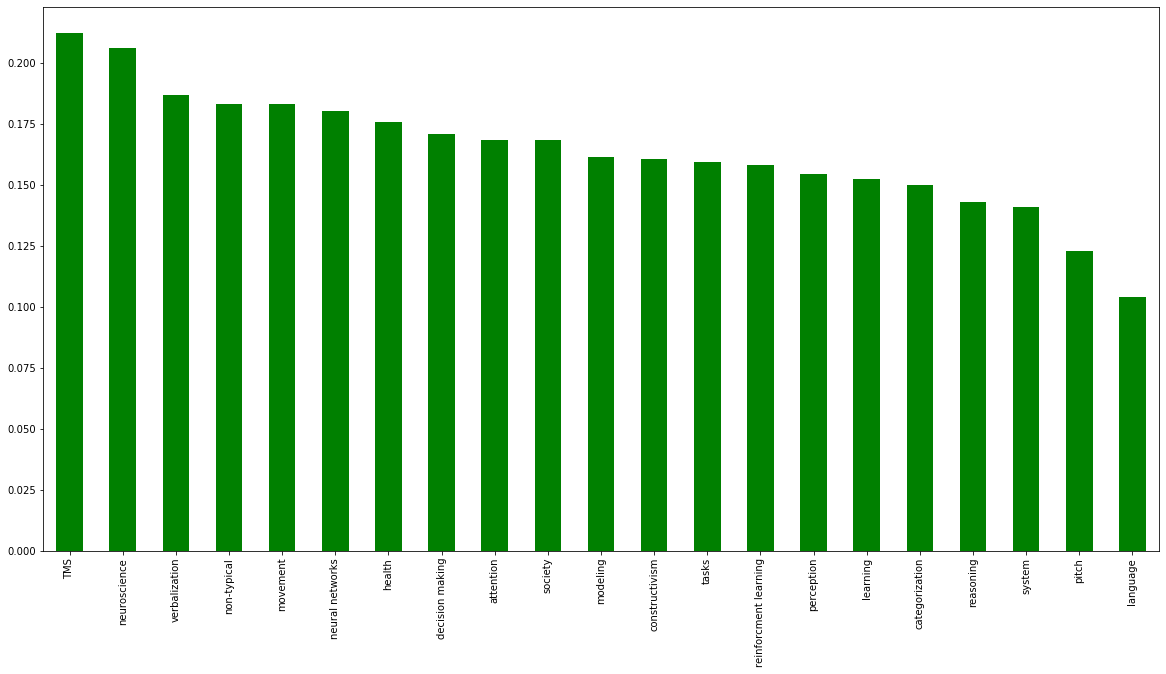

In [15]:
values_by_topic.sort_values(by='Excitement', ascending=False)['Excitement'].plot(kind="bar", figsize=(20, 10), color="green")

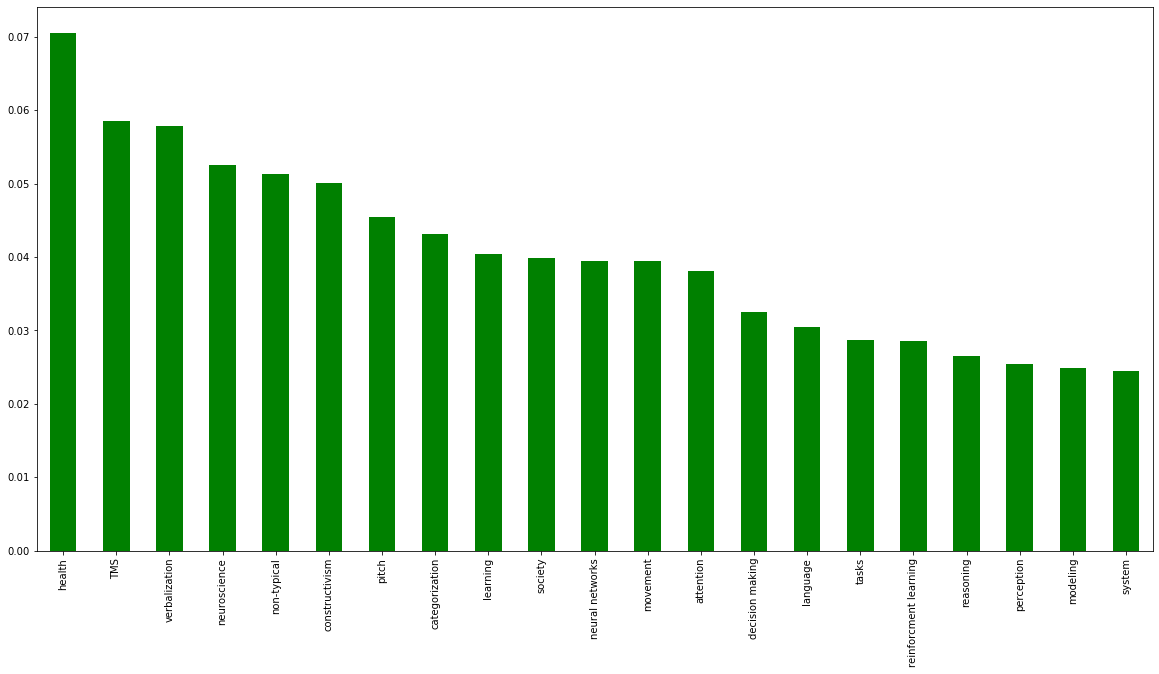

In [16]:
values_by_topic.sort_values(by='Harmony', ascending=False)['Harmony'].plot(kind="bar", figsize=(20, 10), color="green")

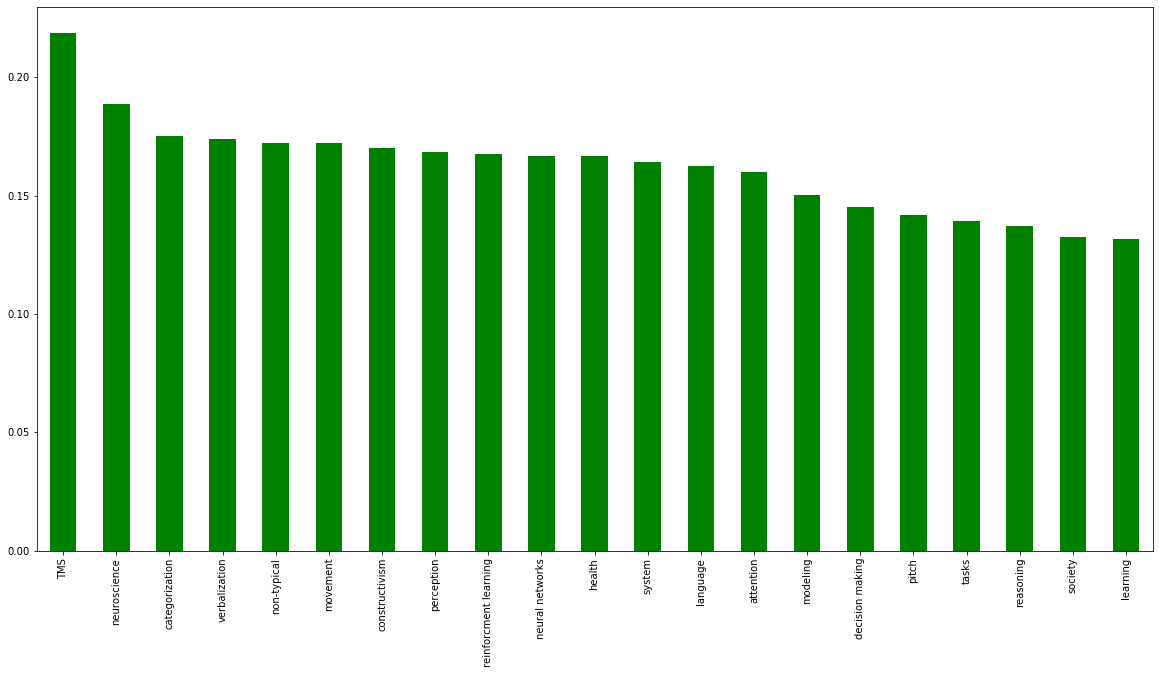

In [17]:
values_by_topic.sort_values(by='Ideal', ascending=False)['Ideal'].plot(kind="bar", figsize=(20, 10), color="green")

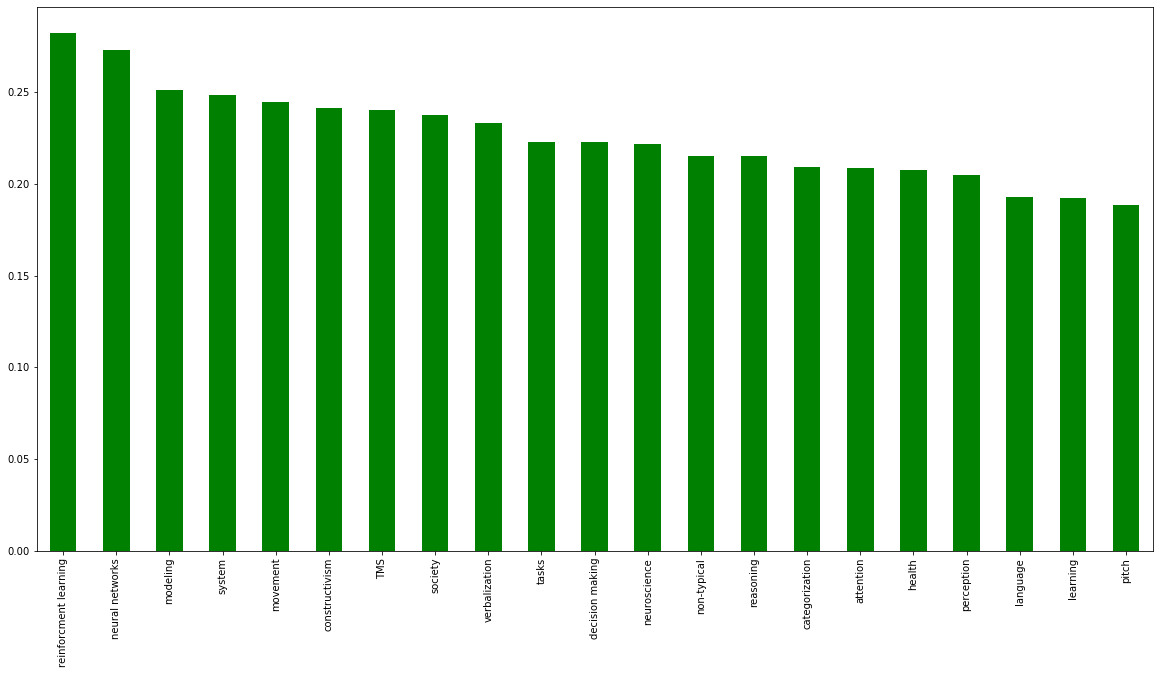

In [18]:
values_by_topic.sort_values(by='Liberty', ascending=False)['Liberty'].plot(kind="bar", figsize=(20, 10), color="green")

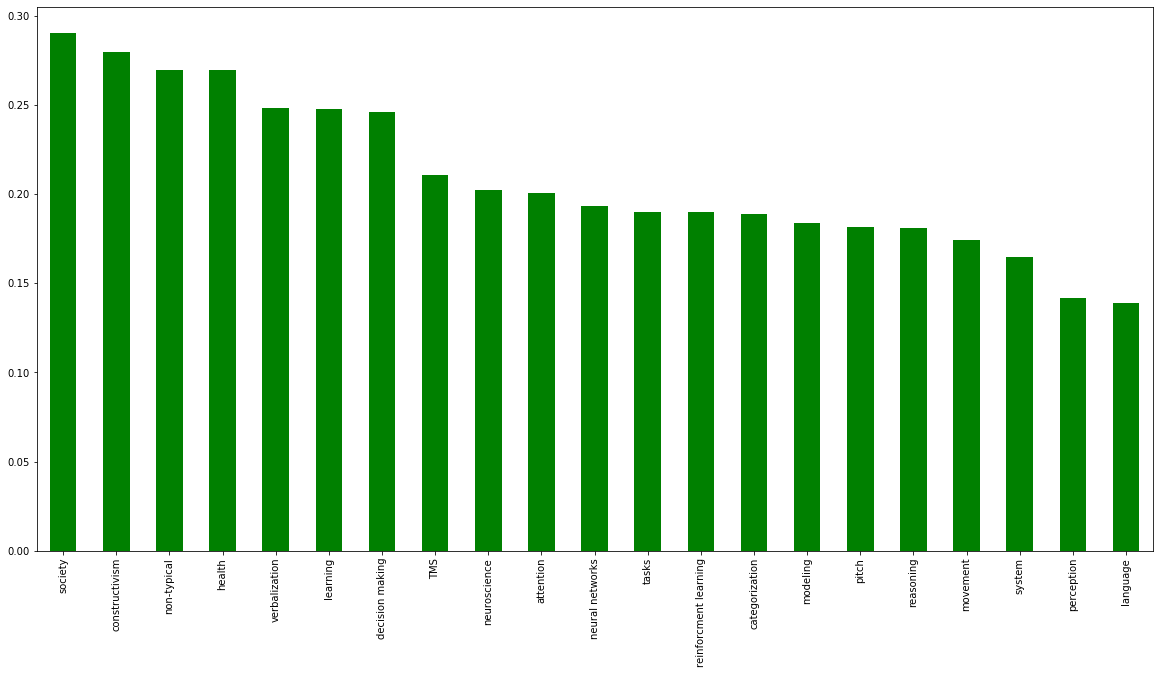

In [19]:
values_by_topic.sort_values(by='Love', ascending=False)['Love'].plot(kind="bar", figsize=(20, 10), color="green")

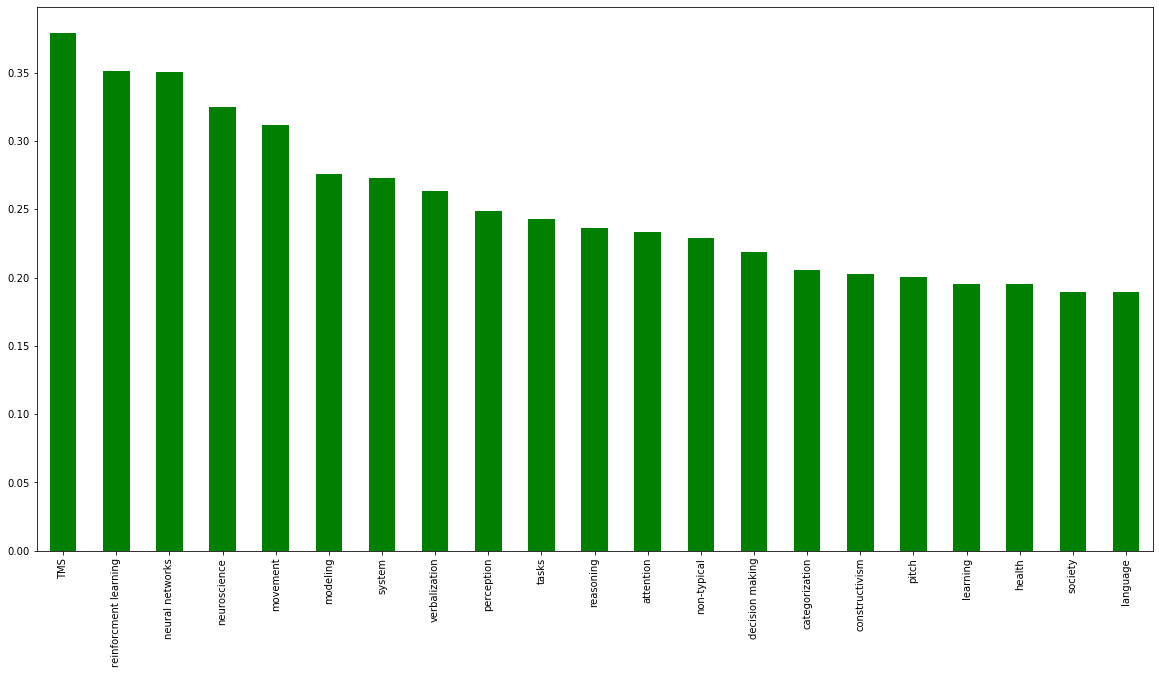

In [20]:
values_by_topic.sort_values(by='Practicality', ascending=False)['Practicality'].plot(kind="bar", figsize=(20, 10), color="green")

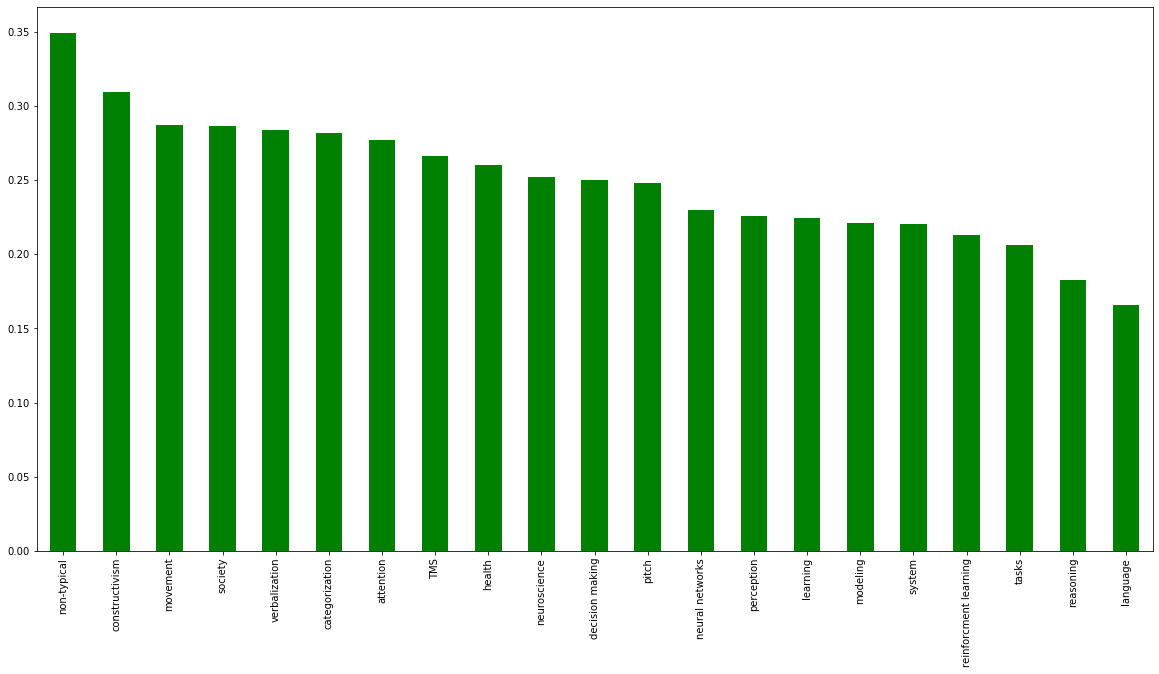

In [21]:
values_by_topic.sort_values(by='Self-expression', ascending=False)['Self-expression'].plot(kind="bar", figsize=(20, 10), color="green")

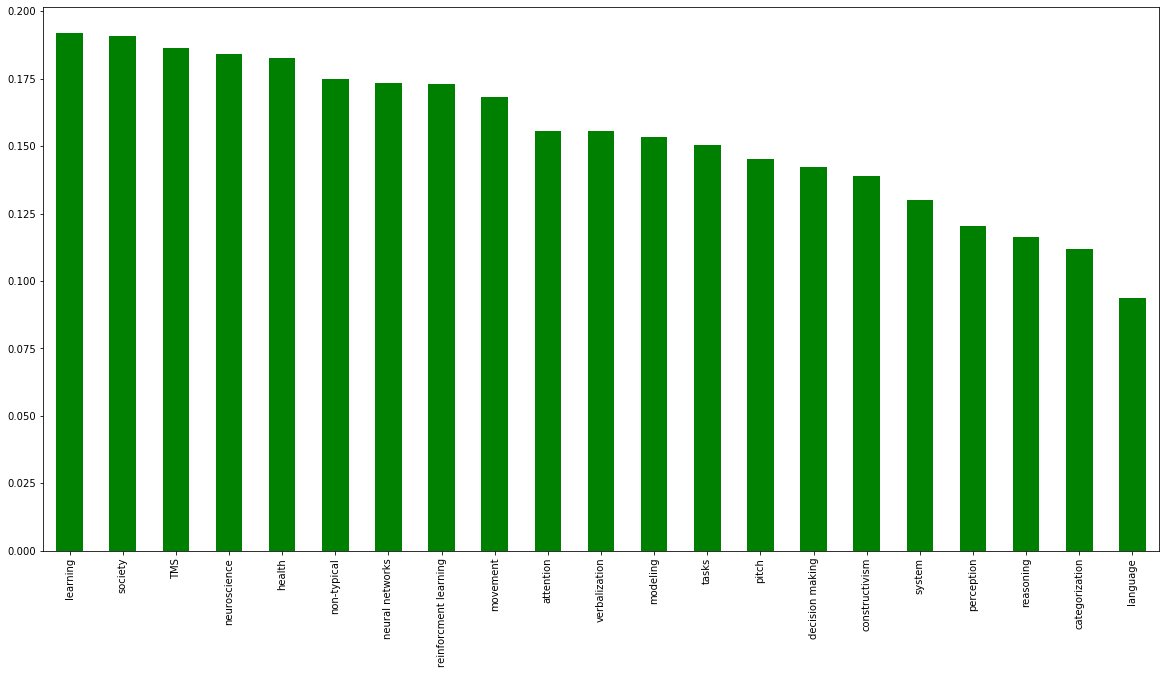

In [22]:
values_by_topic.sort_values(by='Stability', ascending=False)['Stability'].plot(kind="bar", figsize=(20, 10), color="green")

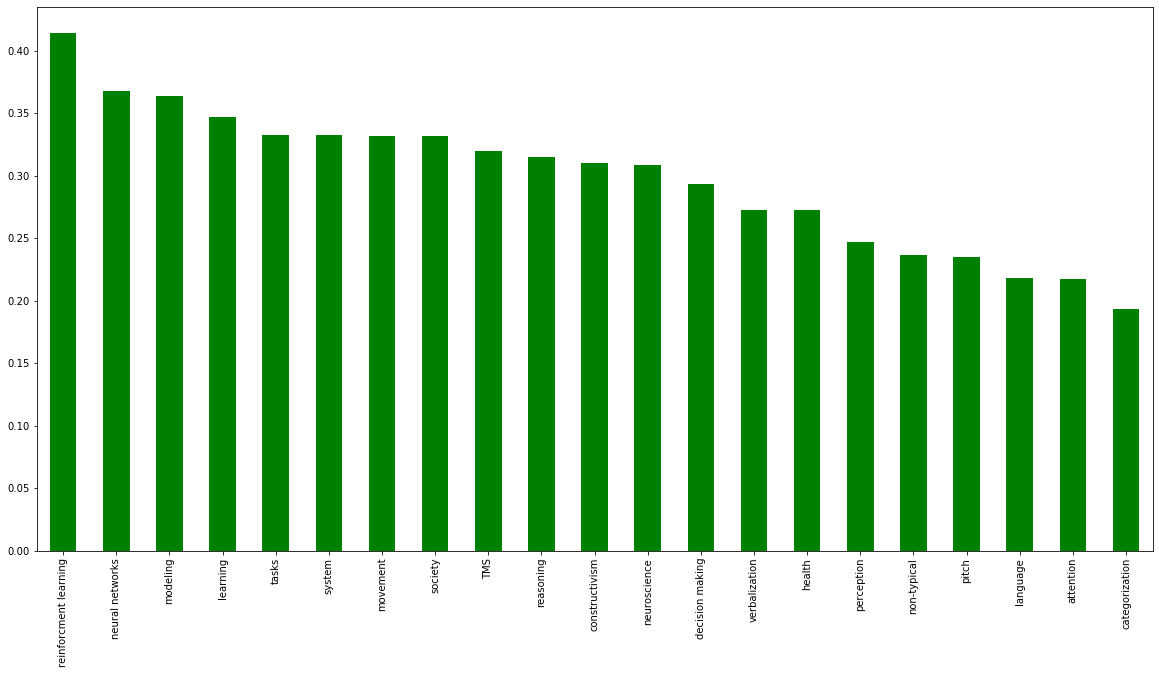

In [23]:
values_by_topic.sort_values(by='Structure', ascending=False)['Structure'].plot(kind="bar", figsize=(20, 10), color="green")